## Week 2 HW

In [1]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt ; plt.style.use('ggplot')
from scipy.stats import nbinom
from scipy.stats import gamma

**1) FCB Exercise 3.3**
Tumor counts: A cancer laboratory is estimating the rate of tumorigenesis in two strains of mice, A and B. They have tumor count data for 10 mice in strain A and 13 mice in strain B. Type A mice have been well studied, and information from other laboratories suggests that type A mice have tumor counts that are approximately Poisson-distributed with a mean of 12. Tumor count rates for type B mice are unknown, but type B mice are related to type A mice. The observes tumor counts for the two populations are <br>
<center> $y_A = (12, 9, 12, 14, 13, 13, 15, 8, 15, 6);$ <br>
$y_B = (11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7).$</center>

1-a) Find the posterior distributions, means, variances and 95% quantile-based confidence intervals for $\theta_A$ and $\theta_B$, assuming a Poisson sampling distribution for each group and the following prior distribution: <br>
$\theta_A \sim gamma(120, 10), \theta_B \sim gamma(12, 1), p(\theta_A, \theta_B)=p(\theta_A) \times p(\theta_b)$.

In [2]:
def likelihood(theta, n, sy):
    return (theta**sy)*np.exp(-n*theta)

In [3]:
# A prior
aA = 120
bA = 10
priorA = st.gamma(aA, scale= 1/bA)

# B prior
aB = 12
bB = 1
priorB = st.gamma(aB, scale=1/bB)

# A data & posterior
nA = 10
syA = sum((12, 9, 12, 14, 13, 13, 15, 8, 15, 6))
postA = st.gamma(aA+syA, scale=1/(bA+nA))

# B data & posterior
nB = 13
syB = sum((11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7))
postB = st.gamma(aB+syB, scale=1/(bB+nB))

**Group A Bayesian Analysis**

In [4]:
aA+syA, bA+nA

(237, 20)

$\theta_A|data \sim Gamma(237, 20)$

In [5]:
# posterior mean (Group A)
(aA+syA)/(bA+nA)

11.85

In [6]:
# posterior variance (Group A)
(aA+syA)/(bA+nA)**2

0.5925

In [7]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA=gamma.ppf(0.025, aA+syA, scale=1/(bA+nA))
ubA=gamma.ppf(0.975, aA+syA, scale=1/(bA+nA))
(lbA, ubA)

(10.389238190941795, 13.405448325642006)

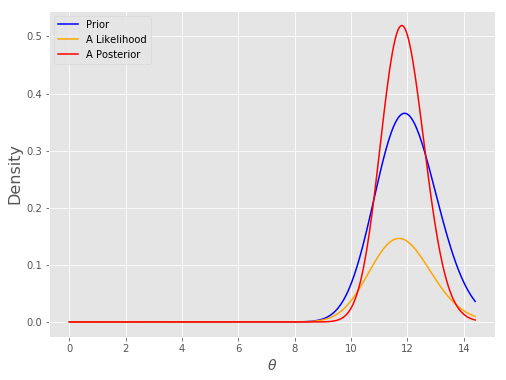

In [8]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.plot(thetas, priorA.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
plt.plot(thetas, 10**(-75)*likelihood(thetas, nA, syA), label='A Likelihood', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

**Group B Bayesian Analysis**

In [9]:
aB+syB, bB+nB

(125, 14)

$\theta_B|data \sim Gamma(125, 14)$

In [10]:
# posterior mean (Group B)
(aB+syB)/(bB+nB)

8.928571428571429

In [11]:
# posterior variance (Group B)
(aB+syB)/(bB+nB)**2

0.6377551020408163

In [12]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB=gamma.ppf(0.025, aB+syB, scale=1/(bB+nB))
ubB=gamma.ppf(0.975, aB+syB, scale=1/(bB+nB))
(lbB,ubB)

(7.432064219464302, 10.560308149242363)

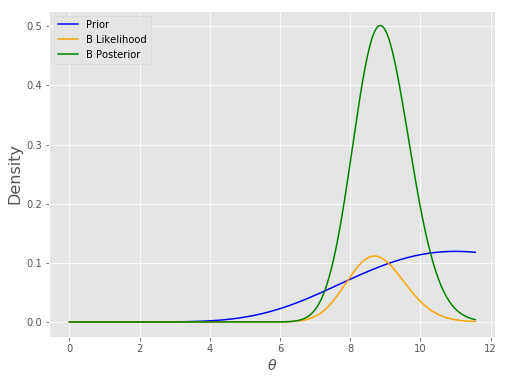

In [13]:
thetas = np.linspace(0.001, ubB+1, 300)
plt.figure(figsize=(8, 6))
plt.plot(thetas, priorB.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
plt.plot(thetas, 10**(-58)*likelihood(thetas, nB, syB), label='B Likelihood', c='orange')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

**Comparing Two Posterior Distributions**

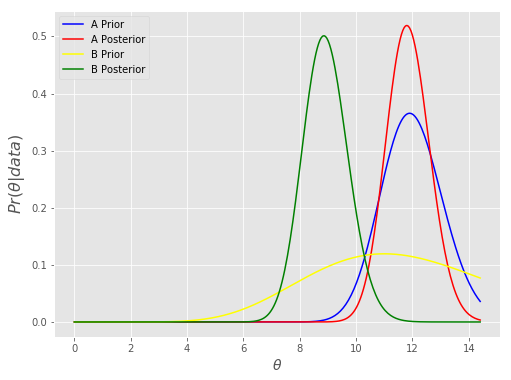

In [14]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.plot(thetas, priorA.pdf(thetas), label='A Prior', c='blue')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, priorB.pdf(thetas), label='B Prior', c='yellow')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

1-b) Compute and plot the posterior expectation of $\theta_B$ under the prior distribution $\theta_B \sim gamma(12 \times n_0, n_0)$ for each value of $n_0 \in \{1, 2, ..., 50\}$. Describe what sort of prior beliefs about $\theta_B$ would be necessary in order for the posterior expectation of $\theta_B$ to be close to that of $\theta_A$

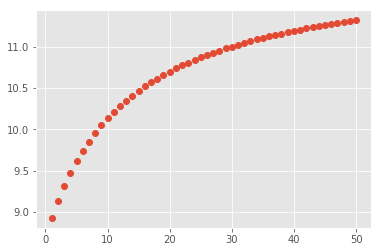

In [15]:
post = []

for i in range(1, 51):
    a = 12*i
    b = i
    prior = st.gamma(a, scale=1/b)
    n = 13
    sy = sum((11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7))
    post.append((a+sy)/(b+n))

plt.plot(range(1, 51), post, 'o')

1-c) Should knowledge about population A tell us anything about population B? Discuss whether or not it makes sense to have $p(\theta_A, \theta_B) = p(\theta_A) \times p(\theta_B)$.

독립일 때 성립

**2) Data가 binomial distribution일 때, likelihood를 exponential families 형태로 변환해보기. 또한 왜 Beta distribution이 conjugacy인지 생각해 보기.**

**3) Relationship between Poisson distribution and Negative Binomial Distribution**
<center> $X \sim NB(r, p)$ where $p(X=x)= \binom{r-1+x}{x} (1-p)^r p^x$ <br>
    Let mean $\frac{pr}{1-p}=\lambda$ &#8594; $p = \frac{\lambda}{r+\lambda}$ </center>

3-1) Prove the following.
<center> $Poi(\lambda) = \lim_{r \to \infty} NB(r, \frac{\lambda}{r+\lambda})$ </center>

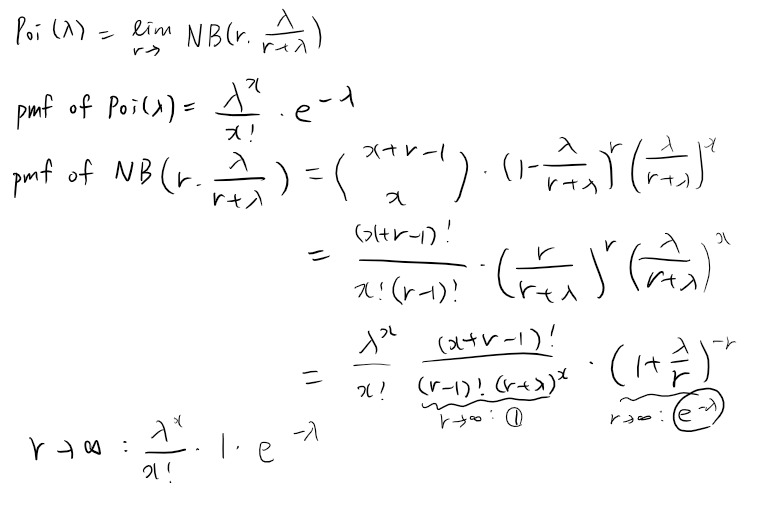

3-2) Compare the variance of each distribution. Show that the Negative Binomial distribution is always overdispersed.

3-3) Likewise, prove the following.
<Center> $Y \sim Binom(n, p)$ where $p(y) = \binom{n}{x}p^yp^{n-y}$ <br>
    Let mean $ np = \lambda $ &#8594; $ p = \frac{\lambda}{n} $ <br>
    $Poi(\lambda)=lim_{n\to\infty} Binom(n, \frac{\lambda}{n})$